In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Создаём dataset

In [2]:
def create_dataset(start=0, stop=5, size=1000):
    X = np.linspace(start=start, stop=stop, num=size)
    y = np.exp(X) + np.sin(X)*20
    
    return (X, y)

In [3]:
X, y = create_dataset()

In [4]:
seed = 47

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

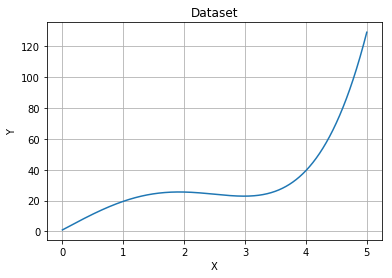

In [6]:
plt.plot(X, y)
plt.grid()
plt.title('Dataset')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [7]:
def plot_loss(train_loss, val_loss):
    plt.plot(train_loss, label='train_loss')
    plt.plot(val_loss, label='val_loss')
    plt.grid()
    plt.legend()
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

# Обучаю модель linear regression

In [8]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

## Обучаем модель

In [9]:
history = History()
reg_model = baseline_model()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=128, epochs=1000, callbacks=[history], verbose=0)

## Визуализируем loss на train и val

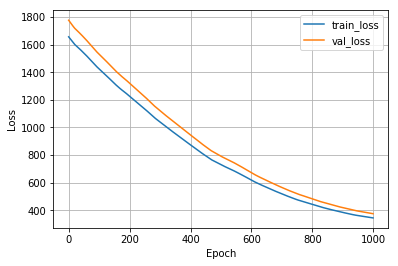

In [10]:
plot_loss(history.history['loss'], history.history['val_loss'])

## Смотрим на качество аппроксимации

In [11]:
y_pred = reg_model.predict(X_test)

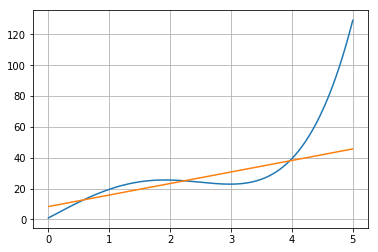

In [12]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()

# Добавляем 1 слой сети

In [14]:
def deep_model_v1():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    model.add(Dense(10, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [15]:
history = History()
reg_model = deep_model_v1()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), 
              batch_size=256, epochs=5000, callbacks=[history], verbose=0)

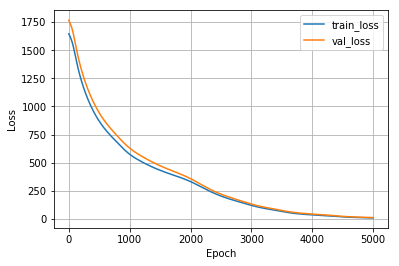

In [16]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [72]:
y_pred = reg_model.predict(X_test)

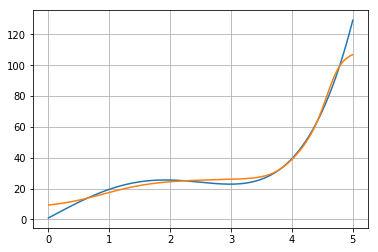

In [73]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()

## Добавляем ещё 1 слой сети

In [74]:
def deep_model_v2():
    # create model
    model = Sequential()
    model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='linear'))
    model.add(Dense(100, input_dim=1, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(100, input_dim=100, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(1, activation='linear', kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adamax')
    return model

In [75]:
history = History()
reg_model = deep_model_v2()
reg_model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=1000, callbacks=[history])

Train on 670 samples, validate on 330 samples
Epoch 1/1000
670/670 [==============================] - 0s 549us/step - loss: 1620.3664 - val_loss: 1704.0290
Epoch 2/1000
670/670 [==============================] - 0s 20us/step - loss: 1564.7388 - val_loss: 1641.6939
Epoch 3/1000
670/670 [==============================] - 0s 20us/step - loss: 1506.3399 - val_loss: 1583.6475
Epoch 4/1000
670/670 [==============================] - 0s 20us/step - loss: 1451.8148 - val_loss: 1528.7190
Epoch 5/1000
670/670 [==============================] - 0s 19us/step - loss: 1401.0722 - val_loss: 1476.4124
Epoch 6/1000
670/670 [==============================] - 0s 20us/step - loss: 1352.1801 - val_loss: 1426.3890
Epoch 7/1000
670/670 [==============================] - 0s 20us/step - loss: 1304.7414 - val_loss: 1378.1722
Epoch 8/1000
670/670 [==============================] - 0s 20us/step - loss: 1259.7902 - val_loss: 1333.0046
Epoch 9/1000
670/670 [==============================] - 0s 20us/step - loss: 1220

670/670 [==============================] - 0s 20us/step - loss: 541.9654 - val_loss: 574.8037
Epoch 152/1000
670/670 [==============================] - 0s 19us/step - loss: 540.4655 - val_loss: 573.4644
Epoch 153/1000
670/670 [==============================] - 0s 19us/step - loss: 538.8531 - val_loss: 571.3957
Epoch 154/1000
670/670 [==============================] - 0s 19us/step - loss: 537.0841 - val_loss: 569.7541
Epoch 155/1000
670/670 [==============================] - 0s 20us/step - loss: 535.2850 - val_loss: 567.6760
Epoch 156/1000
670/670 [==============================] - 0s 20us/step - loss: 533.7741 - val_loss: 565.5245
Epoch 157/1000
670/670 [==============================] - 0s 19us/step - loss: 531.9083 - val_loss: 564.2081
Epoch 158/1000
670/670 [==============================] - 0s 20us/step - loss: 530.0515 - val_loss: 562.7235
Epoch 159/1000
670/670 [==============================] - 0s 20us/step - loss: 528.1005 - val_loss: 560.2746
Epoch 160/1000
670/670 [==========

670/670 [==============================] - 0s 20us/step - loss: 220.5770 - val_loss: 229.3632
Epoch 302/1000
670/670 [==============================] - 0s 20us/step - loss: 219.4011 - val_loss: 227.8846
Epoch 303/1000
670/670 [==============================] - 0s 20us/step - loss: 218.7517 - val_loss: 226.3940
Epoch 304/1000
670/670 [==============================] - 0s 20us/step - loss: 217.6494 - val_loss: 225.2546
Epoch 305/1000
670/670 [==============================] - 0s 20us/step - loss: 216.0899 - val_loss: 224.6688
Epoch 306/1000
670/670 [==============================] - 0s 20us/step - loss: 215.1883 - val_loss: 223.7189
Epoch 307/1000
670/670 [==============================] - 0s 19us/step - loss: 214.2551 - val_loss: 222.2658
Epoch 308/1000
670/670 [==============================] - 0s 20us/step - loss: 213.1661 - val_loss: 221.1392
Epoch 309/1000
670/670 [==============================] - 0s 20us/step - loss: 212.1693 - val_loss: 220.2356
Epoch 310/1000
670/670 [==========

670/670 [==============================] - 0s 20us/step - loss: 108.5330 - val_loss: 111.3412
Epoch 452/1000
670/670 [==============================] - 0s 20us/step - loss: 107.9246 - val_loss: 110.7443
Epoch 453/1000
670/670 [==============================] - 0s 19us/step - loss: 107.3080 - val_loss: 110.4152
Epoch 454/1000
670/670 [==============================] - 0s 20us/step - loss: 106.4694 - val_loss: 109.5513
Epoch 455/1000
670/670 [==============================] - 0s 19us/step - loss: 105.7943 - val_loss: 108.8523
Epoch 456/1000
670/670 [==============================] - 0s 20us/step - loss: 105.0736 - val_loss: 108.2997
Epoch 457/1000
670/670 [==============================] - 0s 20us/step - loss: 104.6060 - val_loss: 108.0332
Epoch 458/1000
670/670 [==============================] - 0s 20us/step - loss: 103.8664 - val_loss: 106.8590
Epoch 459/1000
670/670 [==============================] - 0s 20us/step - loss: 103.0978 - val_loss: 105.8101
Epoch 460/1000
670/670 [==========

670/670 [==============================] - 0s 20us/step - loss: 35.1274 - val_loss: 35.2407
Epoch 604/1000
670/670 [==============================] - 0s 20us/step - loss: 34.9826 - val_loss: 35.0377
Epoch 605/1000
670/670 [==============================] - 0s 20us/step - loss: 34.7747 - val_loss: 34.8104
Epoch 606/1000
670/670 [==============================] - 0s 20us/step - loss: 34.6145 - val_loss: 34.7054
Epoch 607/1000
670/670 [==============================] - 0s 19us/step - loss: 34.4363 - val_loss: 34.4155
Epoch 608/1000
670/670 [==============================] - 0s 19us/step - loss: 34.2605 - val_loss: 34.2264
Epoch 609/1000
670/670 [==============================] - 0s 20us/step - loss: 34.0465 - val_loss: 33.9383
Epoch 610/1000
670/670 [==============================] - 0s 20us/step - loss: 34.0287 - val_loss: 33.8232
Epoch 611/1000
670/670 [==============================] - 0s 20us/step - loss: 33.6497 - val_loss: 33.5190
Epoch 612/1000
670/670 [============================

670/670 [==============================] - 0s 20us/step - loss: 15.3275 - val_loss: 13.3959
Epoch 756/1000
670/670 [==============================] - 0s 20us/step - loss: 15.1722 - val_loss: 13.3120
Epoch 757/1000
670/670 [==============================] - 0s 20us/step - loss: 15.0427 - val_loss: 13.2195
Epoch 758/1000
670/670 [==============================] - 0s 20us/step - loss: 14.9525 - val_loss: 13.0284
Epoch 759/1000
670/670 [==============================] - 0s 20us/step - loss: 14.8349 - val_loss: 12.9102
Epoch 760/1000
670/670 [==============================] - 0s 20us/step - loss: 14.7027 - val_loss: 12.8731
Epoch 761/1000
670/670 [==============================] - 0s 20us/step - loss: 14.5877 - val_loss: 12.6978
Epoch 762/1000
670/670 [==============================] - 0s 20us/step - loss: 14.5269 - val_loss: 12.6156
Epoch 763/1000
670/670 [==============================] - 0s 20us/step - loss: 14.3194 - val_loss: 12.5994
Epoch 764/1000
670/670 [============================

670/670 [==============================] - 0s 20us/step - loss: 4.3697 - val_loss: 3.8446
Epoch 911/1000
670/670 [==============================] - 0s 19us/step - loss: 4.3134 - val_loss: 3.8199
Epoch 912/1000
670/670 [==============================] - 0s 19us/step - loss: 4.2942 - val_loss: 3.7809
Epoch 913/1000
670/670 [==============================] - 0s 20us/step - loss: 4.2845 - val_loss: 3.7787
Epoch 914/1000
670/670 [==============================] - 0s 20us/step - loss: 4.2383 - val_loss: 3.7345
Epoch 915/1000
670/670 [==============================] - 0s 20us/step - loss: 4.2032 - val_loss: 3.7321
Epoch 916/1000
670/670 [==============================] - 0s 19us/step - loss: 4.1971 - val_loss: 3.6937
Epoch 917/1000
670/670 [==============================] - 0s 20us/step - loss: 4.1450 - val_loss: 3.6771
Epoch 918/1000
670/670 [==============================] - 0s 20us/step - loss: 4.2037 - val_loss: 3.6750
Epoch 919/1000
670/670 [==============================] - 0s 19us/step

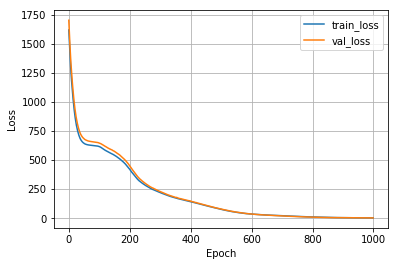

In [76]:
plot_loss(history.history['loss'], history.history['val_loss'])

In [77]:
y_pred = reg_model.predict(X_test)

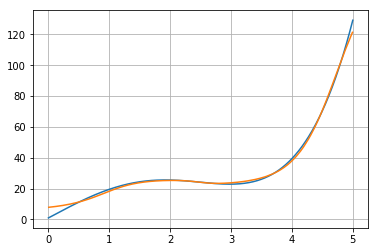

In [78]:
train_arg = np.argsort(X_train)
test_arg = np.argsort(X_test)

plt.plot(X_train[train_arg], y_train[train_arg])
plt.plot(X_test[test_arg], y_pred[test_arg])
plt.grid()
plt.show()